# Extraire les données et les  valeurs des points clés

In [1]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt



import time          
import mediapipe as mp  #pour la detection de corps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  




# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils




def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results




def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    



def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    



import cv2
import mediapipe as mp

# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


results


# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)




pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)




# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)



def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])



result_test = extract_keypoints(results)



np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions


np.load('0.npy')

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar','Waqtach',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30


# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass



label_map = {label:num for num, label in enumerate(actions)}




# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# creation et Evaluation les performances de model 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flattening the sequences and using mean for each sequence
def preprocess_sequences(sequences):
    X_preprocessed = [np.mean(seq, axis=0) for seq in sequences]
    return np.array(X_preprocessed)

X_train_flat = preprocess_sequences(X_train)
X_test_flat = preprocess_sequences(X_test)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


# Créer et entraîner le modèle SVM
model = SVC(kernel='linear')  # Tu peux choisir un autre noyau selon tes besoins
model.fit(X_train_scaled, y_train.argmax(axis=1))  # SVM prend des labels numériques

# Faire des prédictions
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print(f'Accuracy: {accuracy:.2f}')


import joblib

# Sauvegarder le modèle SVM
# joblib.dump(model, 'svm_model.joblib')

# Sauvegarder le scaler
# joblib.dump(scaler, 'scaler.joblib')

#0.91


Accuracy: 0.92


['scaler.joblib']

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Convertir les prédictions et les étiquettes vraies de la représentation codée à chaud en une étiquette catégorielle
ytrue = np.argmax(y_test, axis=1)
yhat = y_pred

# Calculer les métriques
accuracy = accuracy_score(ytrue, yhat)
precision = precision_score(ytrue, yhat, average='weighted')
recall = recall_score(ytrue, yhat, average='weighted')
f1 = f1_score(ytrue, yhat, average='weighted')
conf_matrix = confusion_matrix(ytrue, yhat)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(ytrue, yhat))

Accuracy: 0.9210526315789473
Precision: 0.9578947368421052
Recall (Sensitivity): 0.9210526315789473
F1 Score: 0.928654970760234
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1    

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

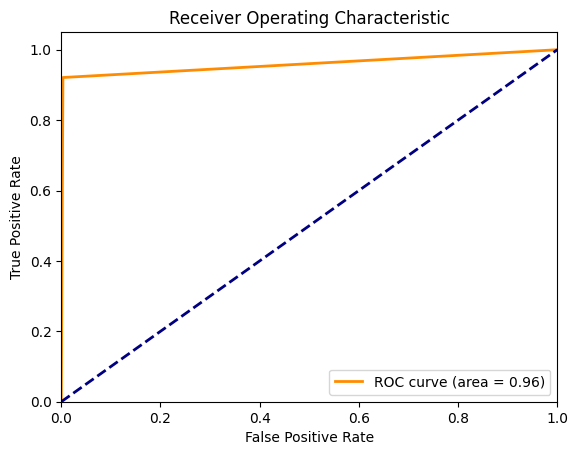

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariser les étiquettes
y_test_bin = label_binarize(ytrue, classes=np.arange(len(actions)))
y_pred_bin = label_binarize(yhat, classes=np.arange(len(actions)))

# Calculer les courbes ROC pour chaque classe
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score

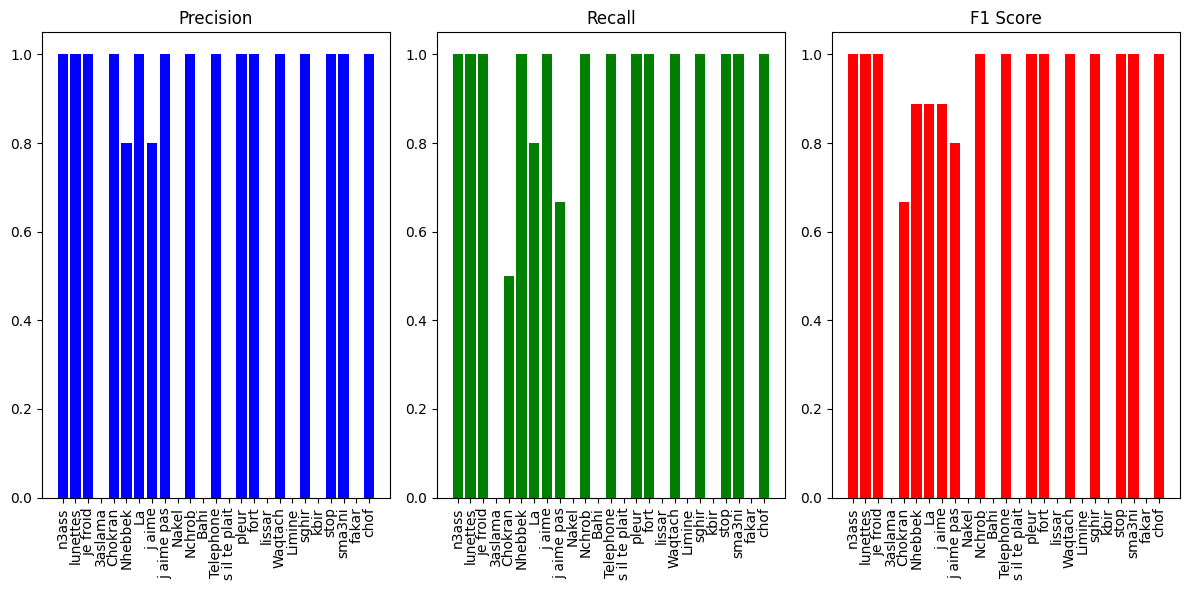

In [5]:
import matplotlib.pyplot as plt

# Calculer les métriques
precision = precision_score(ytrue, yhat, average=None, labels=np.arange(len(actions)))
recall = recall_score(ytrue, yhat, average=None, labels=np.arange(len(actions)))
f1 = f1_score(ytrue, yhat, average=None, labels=np.arange(len(actions)))

# Créer des graphiques de précision, rappel et F1
plt.figure(figsize=(12, 6))

# Précision
plt.subplot(1, 3, 1)
plt.bar(actions, precision, color='blue')
plt.title('Precision')
plt.xticks(rotation=90)

# Rappel
plt.subplot(1, 3, 2)
plt.bar(actions, recall, color='green')
plt.title('Recall')
plt.xticks(rotation=90)

# Score F1
plt.subplot(1, 3, 3)
plt.bar(actions, f1, color='red')
plt.title('F1 Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


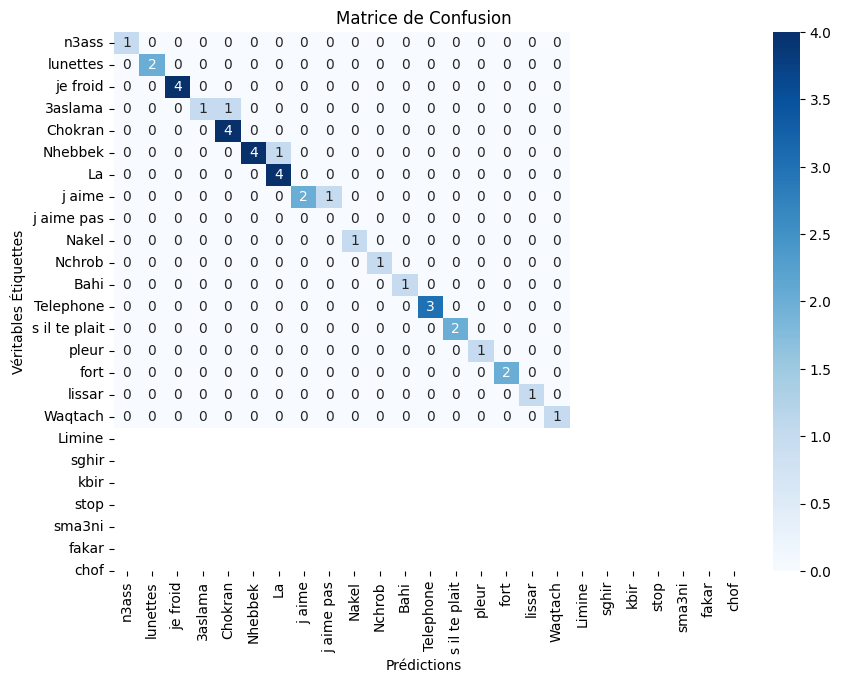

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Faire des prédictions
y_pred = model.predict(X_test_scaled)

# Convertir les étiquettes test en une forme unique
y_test_labels = y_test.argmax(axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_labels, y_pred)

# Créer une figure pour la heatmap
plt.figure(figsize=(10, 7))

# Créer une heatmap avec des labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=actions, yticklabels=actions)

# Ajouter des titres et des labels
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


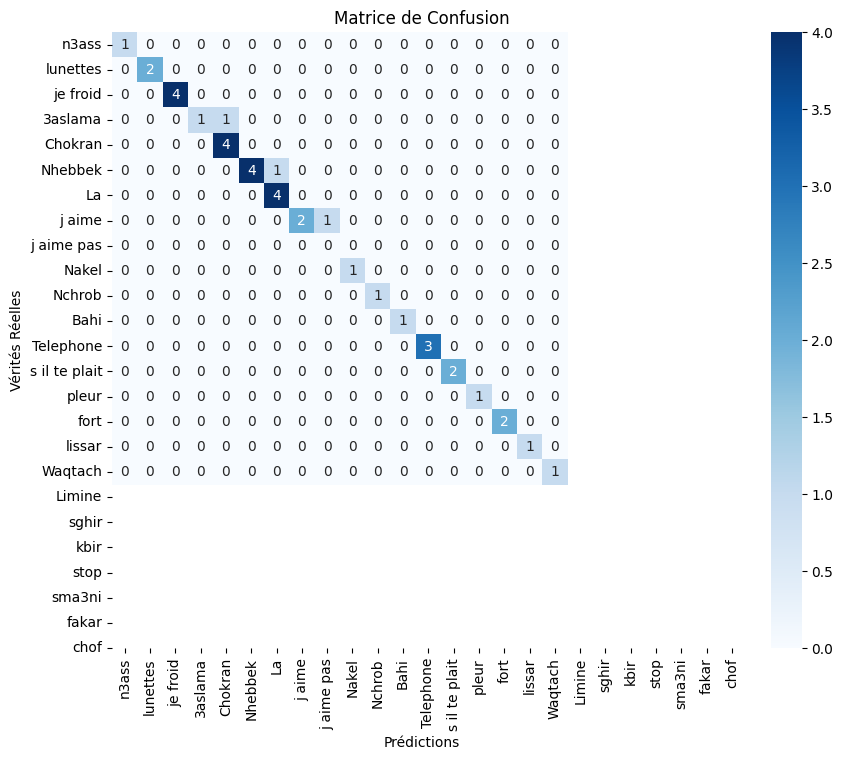

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Définir les labels des classes
labels = list(label_map.keys())

# Fonction pour tracer la matrice de confusion
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités Réelles')
    plt.title('Matrice de Confusion')
    plt.show()

# Tracer la matrice de confusion
plot_confusion_matrix(cm, labels)


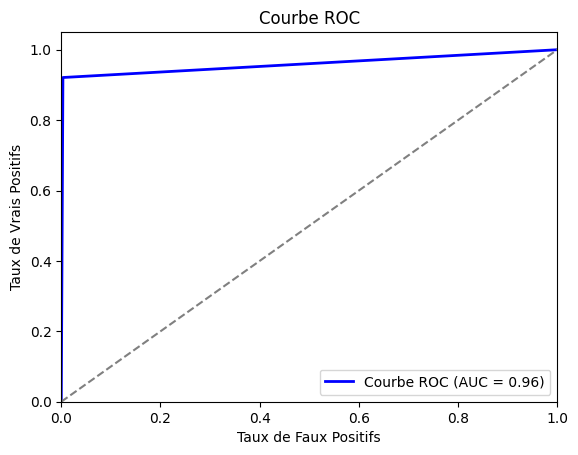

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariser les étiquettes pour les courbes ROC
y_test_bin = label_binarize(y_test_labels, classes=np.unique(y_test_labels))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test_labels))

# Calculer les courbes ROC et les valeurs AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


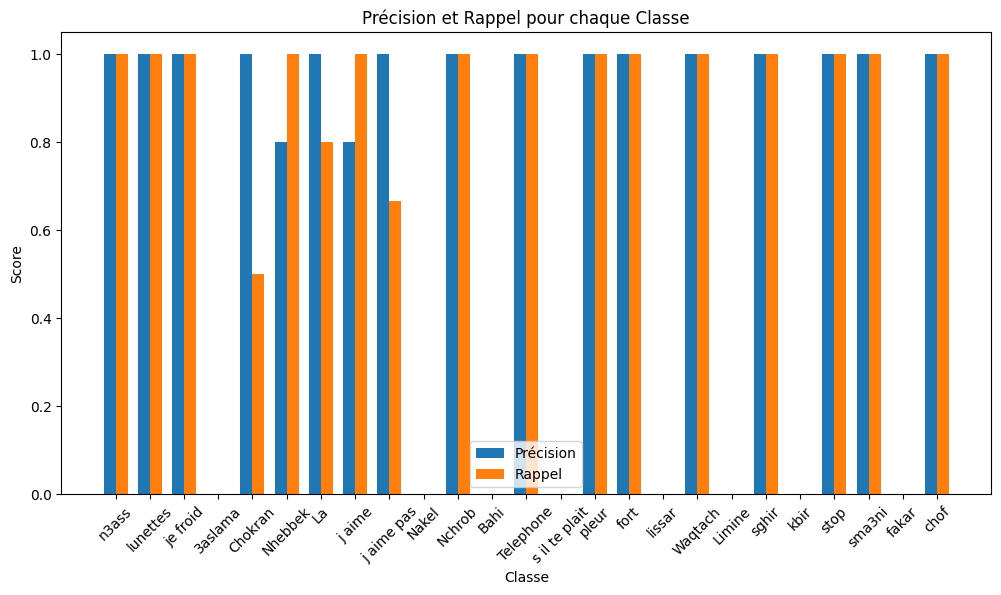

In [9]:
from sklearn.metrics import precision_recall_fscore_support

# Calculer la précision, le rappel et le F-score pour chaque classe
precision, recall, fscore, _ = precision_recall_fscore_support(y_test_labels, y_pred, average=None, labels=range(len(actions)))

# Tracer la précision et le rappel pour chaque classe
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
ind = np.arange(len(actions))

# Barres pour la précision
bars1 = ax.bar(ind - width/2, precision, width, label='Précision')

# Barres pour le rappel
bars2 = ax.bar(ind + width/2, recall, width, label='Rappel')

# Ajouter les labels
ax.set_xlabel('Classe')
ax.set_ylabel('Score')
ax.set_title('Précision et Rappel pour chaque Classe')
ax.set_xticks(ind)
ax.set_xticklabels(actions, rotation=45)
ax.legend()

plt.show()


In [10]:
from sklearn.model_selection import cross_val_score

# Calculer les scores de validation croisée
cross_val_scores = cross_val_score(model, X_train_scaled, y_train.argmax(axis=1), cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {cross_val_scores.mean():.2f}')


Cross-Validation Scores: [0.97202797 0.95804196 0.97887324 0.95070423 0.94366197]
Mean Cross-Validation Score: 0.96


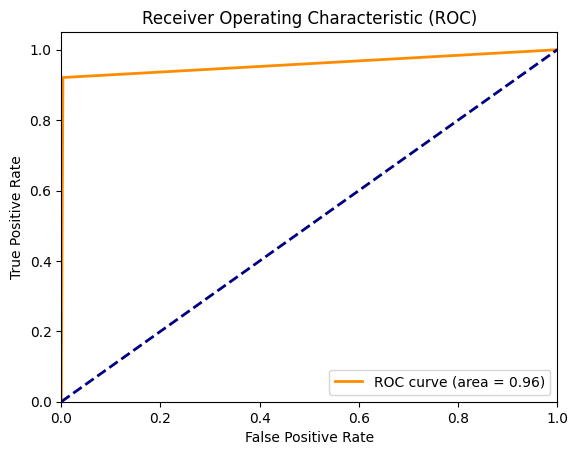

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariser les étiquettes pour la courbe ROC
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.arange(len(actions)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(actions)))

# Calcul des courbes ROC et AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


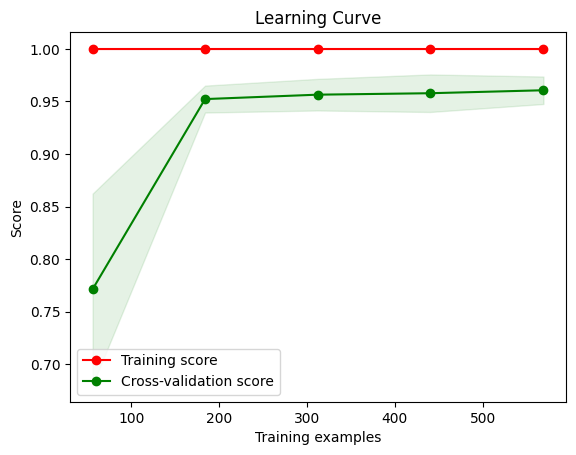

In [12]:
from sklearn.model_selection import learning_curve

# Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train.argmax(axis=1), cv=5)

# Moyenne et écart-type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Affichage des courbes d'apprentissage
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


# Test en temps réel

In [14]:
import cv2
import numpy as np
import joblib
import mediapipe as mp
from sklearn.preprocessing import StandardScaler

# Initialiser MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle SVM et le scaler
model = joblib.load('svm_model.joblib')
scaler = joblib.load('scaler.joblib')

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Initialiser la capture vidéo
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            continue
        
        # Détection et prédiction
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        
        # Extraire les points de repère
        keypoints = extract_keypoints(results)
        keypoints = keypoints.reshape(1, -1)
        
        # Normaliser les points de repère
        keypoints_scaled = scaler.transform(keypoints)
        
        # Faire la prédiction
        prediction = model.predict(keypoints_scaled)
        action = actions[prediction[0]]
        
        # Afficher le résultat de la prédiction sur l'image
        cv2.putText(image, f'Action: {action}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Afficher à l'écran
        cv2.imshow('Real-time Sign Language Detection', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('Symb